In [1]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longtitude combinations 
lats = np.random.uniform(low =-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list 
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longtitude combination 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
    
    #If the city is unique, then we will add it to the cities list 
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count 
len(cities)

630

In [5]:
# Import the requests library
import requests 
#Import the API key 
from config import weather_api_key
#Import the datetime module from the datetime library 
from datetime import datetime 

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=af276efb8e09fe8a2c858c894a0771b8


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | fomboni
Processing Record 3 of Set 13 | nouakchott
Processing Record 4 of Set 13 | houma
Processing Record 5 of Set 13 | albany
Processing Record 6 of Set 13 | east london
Processing Record 7 of Set 13 | tiksi
Processing Record 8 of Set 13 | hermanus
Processing Record 9 of Set 13 | nikolskoye
Processing Record 10 of Set 13 | new norfolk
Processing Record 11 of Set 13 | chuy
Processing Record 12 of Set 13 | fantan
Processing Record 13 of Set 13 | codrington
Processing Record 14 of Set 13 | souillac
Processing Record 15 of Set 13 | verkhnyaya toyma
Processing Record 16 of Set 13 | arraial do cabo
Processing Record 17 of Set 13 | ancud
Processing Record 18 of Set 13 | qaanaaq
Processing Record 19 of Set 13 | longonjo
Processing Record 20 of Set 13 | nanortalik
Processing Record 21 of Set 13 | jamestown
Processing Record 22 of Set 13 | bluff
Processing Record 

Processing Record 35 of Set 16 | iroquois falls
Processing Record 36 of Set 16 | amurzet
Processing Record 37 of Set 16 | zhoucheng
Processing Record 38 of Set 16 | nioki
Processing Record 39 of Set 16 | half moon bay
Processing Record 40 of Set 16 | brae
Processing Record 41 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 16 | mason
Processing Record 43 of Set 16 | ippy
Processing Record 44 of Set 16 | carnarvon
Processing Record 45 of Set 16 | margate
Processing Record 46 of Set 16 | bay roberts
Processing Record 47 of Set 16 | kavieng
Processing Record 48 of Set 16 | vaini
Processing Record 49 of Set 16 | saskylakh
Processing Record 50 of Set 16 | tchollire
Processing Record 1 of Set 17 | satitoa
City not found. Skipping...
Processing Record 2 of Set 17 | magistralnyy
Processing Record 3 of Set 17 | ucluelet
Processing Record 4 of Set 17 | bahia blanca
Processing Record 5 of Set 17 | celestun
Processing Record 6 of Set 17 | san patricio
Processing Re

Processing Record 19 of Set 20 | suntar
Processing Record 20 of Set 20 | port hardy
Processing Record 21 of Set 20 | shenjiamen
Processing Record 22 of Set 20 | belushya guba
City not found. Skipping...
Processing Record 23 of Set 20 | inderborskiy
City not found. Skipping...
Processing Record 24 of Set 20 | krasnyy kholm
Processing Record 25 of Set 20 | melchor de mencos
Processing Record 26 of Set 20 | samarai
Processing Record 27 of Set 20 | schwanewede
Processing Record 28 of Set 20 | alikalia
Processing Record 29 of Set 20 | lucea
Processing Record 30 of Set 20 | saint-augustin
Processing Record 31 of Set 20 | vallenar
Processing Record 32 of Set 20 | ulaangom
Processing Record 33 of Set 20 | agadez
Processing Record 34 of Set 20 | srednekolymsk
Processing Record 35 of Set 20 | yanan
City not found. Skipping...
Processing Record 36 of Set 20 | banmo
City not found. Skipping...
Processing Record 37 of Set 20 | hailey
Processing Record 38 of Set 20 | rawannawi
City not found. Skippi

Processing Record 1 of Set 24 | rapid valley
Processing Record 2 of Set 24 | bantou
Processing Record 3 of Set 24 | manta
Processing Record 4 of Set 24 | zambezi
Processing Record 5 of Set 24 | tezu
Processing Record 6 of Set 24 | empalme
Processing Record 7 of Set 24 | jaragua
Processing Record 8 of Set 24 | saint-joseph
Processing Record 9 of Set 24 | jijiga
Processing Record 10 of Set 24 | chilia veche
Processing Record 11 of Set 24 | mpongwe
Processing Record 12 of Set 24 | nicoya
Processing Record 13 of Set 24 | tocopilla
Processing Record 14 of Set 24 | dinsor
City not found. Skipping...
Processing Record 15 of Set 24 | carauari
Processing Record 16 of Set 24 | santa cruz
Processing Record 17 of Set 24 | tsienyane
City not found. Skipping...
Processing Record 18 of Set 24 | skibbereen
Processing Record 19 of Set 24 | eyl
Processing Record 20 of Set 24 | maua
Processing Record 21 of Set 24 | usinsk
Processing Record 22 of Set 24 | wynyard
Processing Record 23 of Set 24 | shache
Pr

In [8]:
# Conver the array of dictionaries to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,74,80,8.01,NZ,2020-04-18 23:06:02
1,Fomboni,-12.28,43.74,82.76,72,75,10.85,KM,2020-04-18 23:06:03
2,Nouakchott,18.09,-15.98,66.20,88,0,14.99,MR,2020-04-18 23:02:02
3,Houma,29.60,-90.72,72.00,94,40,5.75,US,2020-04-18 23:06:03
4,Albany,42.60,-73.97,46.00,55,76,11.52,US,2020-04-18 23:02:35
5,East London,-33.02,27.91,69.89,66,0,18.19,ZA,2020-04-18 23:05:42
6,Tiksi,71.69,128.87,10.29,85,68,3.94,RU,2020-04-18 23:05:59
7,Hermanus,-34.42,19.23,64.00,60,78,1.01,ZA,2020-04-18 23:06:04
8,Nikolskoye,59.70,30.79,37.40,92,90,11.18,RU,2020-04-18 23:06:04
9,New Norfolk,-42.78,147.06,50.00,85,79,2.19,AU,2020-04-18 23:02:30


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reorder_df = city_data_df[new_column_order]

In [10]:
city_data_reorder_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-04-18 23:06:02,-46.19,168.86,53.01,74,80,8.01
1,Fomboni,KM,2020-04-18 23:06:03,-12.28,43.74,82.76,72,75,10.85
2,Nouakchott,MR,2020-04-18 23:02:02,18.09,-15.98,66.20,88,0,14.99
3,Houma,US,2020-04-18 23:06:03,29.60,-90.72,72.00,94,40,5.75
4,Albany,US,2020-04-18 23:02:35,42.60,-73.97,46.00,55,76,11.52
...,...,...,...,...,...,...,...,...,...
570,Nova Borova,UA,2020-04-18 23:08:16,50.69,28.63,37.85,69,88,5.84
571,Tiruttani,IN,2020-04-18 23:08:16,13.18,79.61,82.40,88,20,3.69
572,Narok,KE,2020-04-18 23:08:16,-1.08,35.86,59.92,54,100,2.15
573,Shetpe,KZ,2020-04-18 23:08:16,44.17,52.12,54.46,56,69,4.79


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV 
city_data_reorder_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_reorder_df["Lat"]
max_temps = city_data_reorder_df["Max Temp"]
humidity = city_data_reorder_df["Humidity"]
cloudiness = city_data_reorder_df["Cloudiness"]
wind_speed = city_data_reorder_df["Wind Speed"]

In [13]:
import matplotlib. pyplot as plt

In [14]:
# Import the time module 
import time 
# Get today's date in seconds 
today = time.time()
today

1587251297.10692

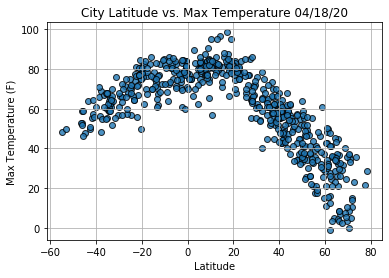

In [15]:
# Build the scatter plot for latitude vs max temp 
plt.scatter(lats, 
            max_temps,
            edgecolor = "black", linewidths=1, marker="o", 
            alpha =0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

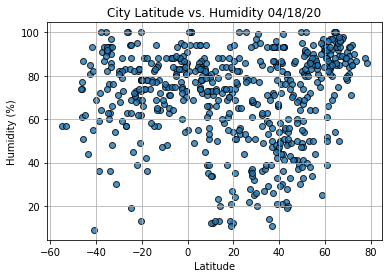

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

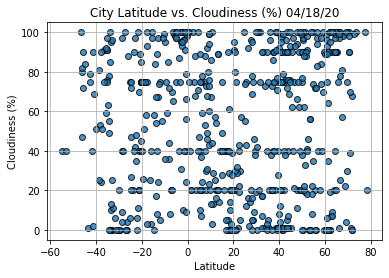

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

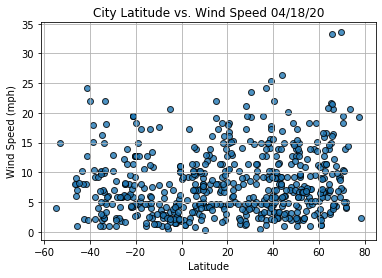

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to perform linear regression on the weather data 
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Souillac
Lat                        -20.52
Lng                         57.52
Max Temp                    78.01
Humidity                       78
Cloudiness                     75
Wind Speed                  12.75
Country                        MU
Date          2020-04-18 23:02:46
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
570     True
571     True
572    False
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,74,80,8.01,NZ,2020-04-18 23:06:02
1,Fomboni,-12.28,43.74,82.76,72,75,10.85,KM,2020-04-18 23:06:03
2,Nouakchott,18.09,-15.98,66.20,88,0,14.99,MR,2020-04-18 23:02:02
3,Houma,29.60,-90.72,72.00,94,40,5.75,US,2020-04-18 23:06:03
4,Albany,42.60,-73.97,46.00,55,76,11.52,US,2020-04-18 23:02:35


In [23]:
# Create Northern and Southern Hempisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
from scipy.stats import linregress

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


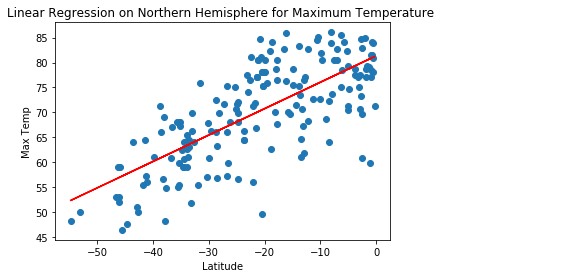

In [35]:
#Call the Function
plt.title("Linear Regression on Northern Hemisphere for Maximum Temperature ")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))



In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

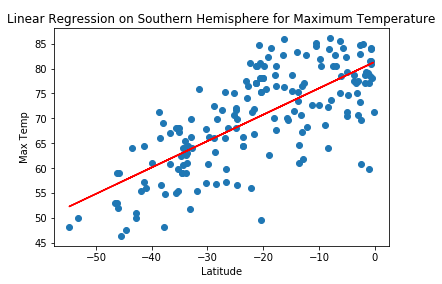

In [37]:
# Call the function.
plt.title("Linear Regression on Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

In [41]:
# Linear Regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

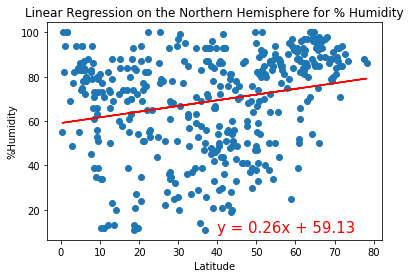

In [43]:
#Call the Function 
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemispher \nfor % Humidity', '%Humidity', (40,10))

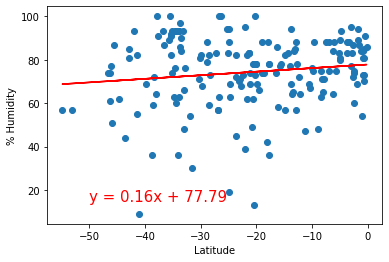

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

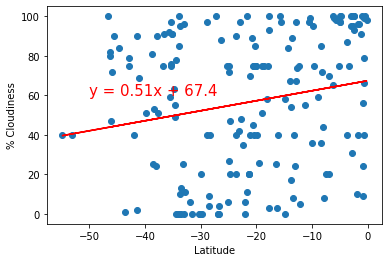

In [47]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

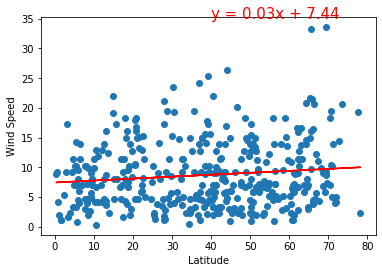

In [50]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

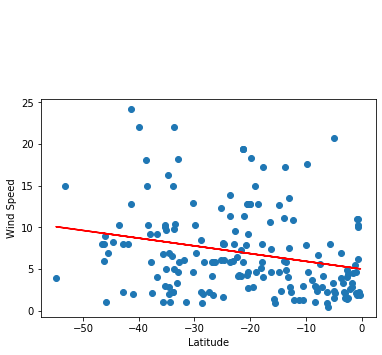

In [51]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))